In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
sales = pd.read_csv(r"C:\Users\RBI\Downloads\sales (1).csv")

In [3]:
sales.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product
0,203,Connecticut,East,Small Market,107,176,292,116,69,38,962,110,110,160,270,2,04-01-2010 00:00,Coffee,Columbian
1,203,Connecticut,East,Small Market,75,135,225,90,60,29,1148,90,80,130,210,2,07-01-2010 00:00,Coffee,Columbian
2,203,Connecticut,East,Small Market,122,195,325,130,73,42,1134,130,110,180,290,2,11-01-2010 00:00,Coffee,Columbian
3,203,Connecticut,East,Small Market,105,174,289,115,69,37,1166,110,100,160,260,2,12-01-2010 00:00,Coffee,Columbian
4,203,NaN,East,Small Market,104,135,223,90,56,29,1148,90,80,130,210,2,07-01-2011 00:00,NaN,Columbian


In [4]:
sales.shape

(4345, 19)

In [5]:
# check the missing values
sales.isnull().sum()

Area Code           0
State             698
Market              0
Market Size         0
Profit              0
Margin              0
Sales               0
COGS                0
Total Expenses      0
Marketing           0
Inventory           0
Budget Profit       0
Budget COGS         0
Budget Margin       0
Budget Sales        0
ProductId           0
Date                0
Product Type      747
Product             0
dtype: int64

There are missing values present in the data, but they are very less, so lets drop it.

In [6]:
sales.dropna(inplace=True, axis=0)

In [7]:
sales.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
dtype: int64

Now the data has no missing values present.

In [8]:
# check the duplicated values
sales.duplicated().sum()

97

There are 97 duplicated values present in the data so lets drop it.

In [9]:
# drop the duplocated values
sales.drop_duplicates(inplace=True)

In [10]:
sales.duplicated().sum()

0

Now the duplicated values are removed.

In [11]:
# check dtypes
sales.dtypes

Area Code          int64
State             object
Market            object
Market Size       object
Profit             int64
Margin             int64
Sales              int64
COGS               int64
Total Expenses     int64
Marketing          int64
Inventory          int64
Budget Profit      int64
Budget COGS        int64
Budget Margin      int64
Budget Sales       int64
ProductId          int64
Date              object
Product Type      object
Product           object
dtype: object

The Date variable is in object datatype, convert it into datetime variable. After that split the date variable into date month and year.

In [11]:
# convert date varaible from object to datetime
sales['Date'] = pd.to_datetime(sales['Date'])

In [12]:
# convert object datatype into datetime
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%y')

In [13]:
# Extract Date, Month, Year
sales['sales_date'] = sales['Date'].dt.day
sales['sales_month'] = sales['Date'].dt.month
sales['sales_year'] = sales['Date'].dt.year

Now the sale_date, sales_month, and sales_year has been extracted from the Date variable.

# Exploratory Data Analysis

## What are the different categories of major products?

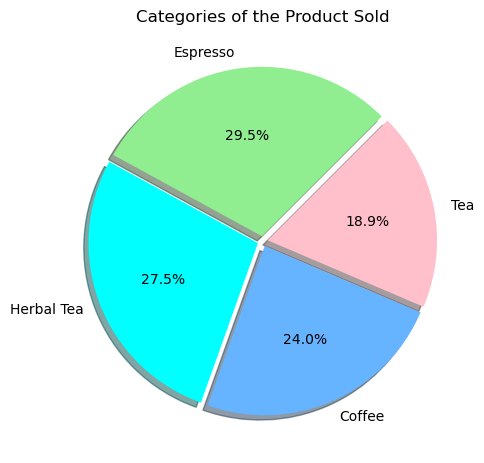

In [14]:
labels = sales["Product Type"].value_counts().index
data = sales["Product Type"].value_counts()
col = ['lightgreen',"cyan",'#66b3ff',"pink","yellow"]

plt.figure(figsize = (5.5,5.5))
plt.pie(data, labels=labels, autopct='%1.1f%%',colors=col,startangle=45,shadow=True, explode=[0.03,0.03,0.03,0.03])
plt.title('Categories of the Product Sold',color="black")
plt.show()

* There are majourly 4 different types of products sold and that is: Tea, Coffee, Herbal Tea and Expresso.

## How are the sales of these major products?

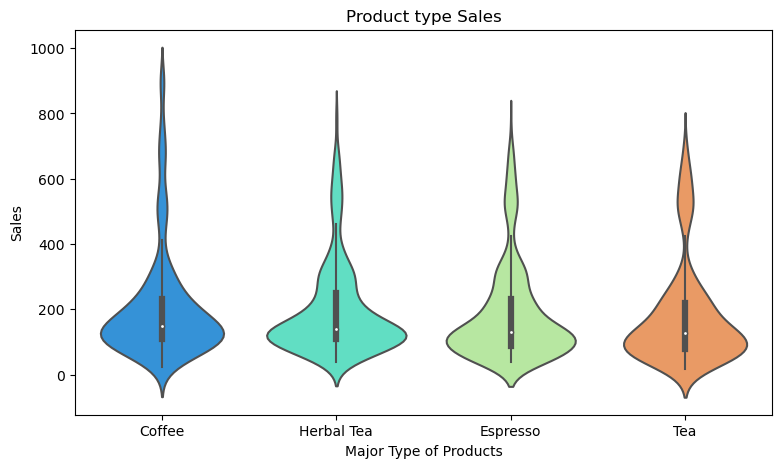

In [15]:
plt.figure(figsize=(9,5))
sns.violinplot(data=sales, x='Product Type', y='Sales', palette='rainbow')
plt.xlabel('Major Type of Products')
plt.ylabel('Sales')
#plt.xticks(rotation=60)
plt.title('Product type Sales')
plt.show();


* The graph shows that coffee products contribute to the higest amount of sales, while tea products have the least sales.

## How are the sales of different Products?

In [16]:
# The types of products
sales['Product'].value_counts()

Product
Lemon                407
Caffe Mocha          383
Columbian            348
Decaf Espresso       323
Chamomile            322
Decaf Irish Cream    299
Darjeeling           235
Green Tea            201
Caffe Latte          181
Earl Grey            177
Mint                 162
Amaretto             132
Regular Espresso      70
Name: count, dtype: int64

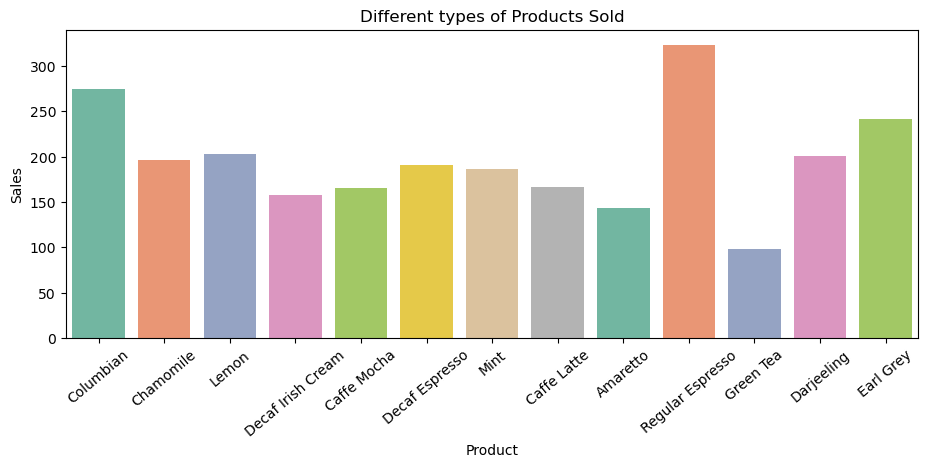

In [17]:
plt.figure(figsize = (11,4))
sns.barplot(x='Product',y='Sales',data=sales, errorbar=('ci', 0),palette='Set2')  
plt.xticks(rotation=40)  
plt.title('Different types of Products Sold',color="black")
plt.show()

* It can be seen that Regular Espresso has the high amount of sales, Columbian, Earl Grey etc, while Green Tea has the least amount of sales.

## What are the different market sizes?

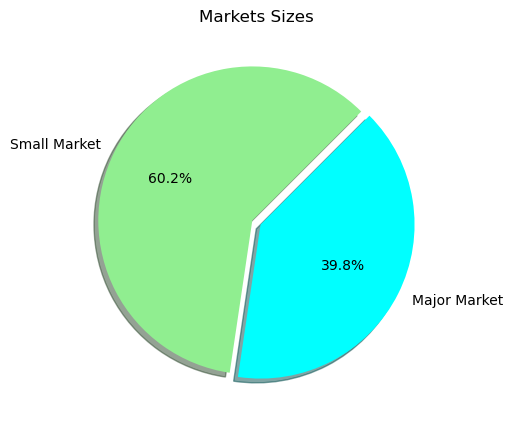

In [18]:
labels = sales["Market Size"].value_counts().index
data = sales["Market Size"].value_counts()
col = ['lightgreen',"cyan",'#66b3ff',"pink","yellow"]

plt.figure(figsize = (5,5))
plt.pie(data, labels=labels, autopct='%1.1f%%',colors=col,startangle=45,shadow=True, explode=[0.03,0.03])
plt.title('Markets Sizes',color="black")
plt.show()

* There are more number of Small markets than the Major Major Markets.

## How are the sales of different market sizes?

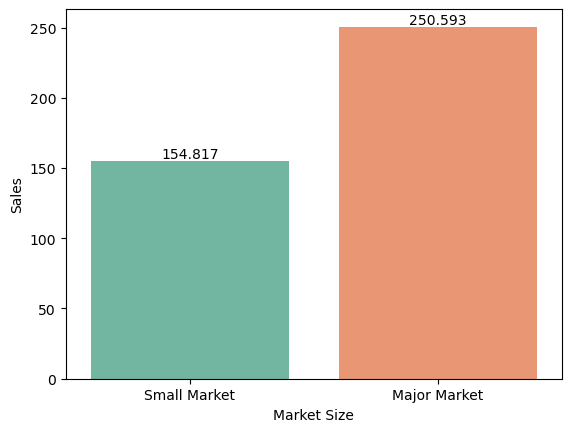

<Figure size 400x400 with 0 Axes>

In [19]:
a=sns.barplot(x='Market Size',y='Sales',data=sales, errorbar=('ci', 0),palette="Set2")  
for bars in a.containers:
    a.bar_label(bars)
plt.figure(figsize = (4,4))
plt.show()

* From the above graph it can be seen that even if there are less number of Major Market present in the country still they make a huge amount of sales comapred to the Small Market.
* While number of Small Market are more, yet the sales made by them is less than Major Markets.

## How are the Sales in different States according to the market size?

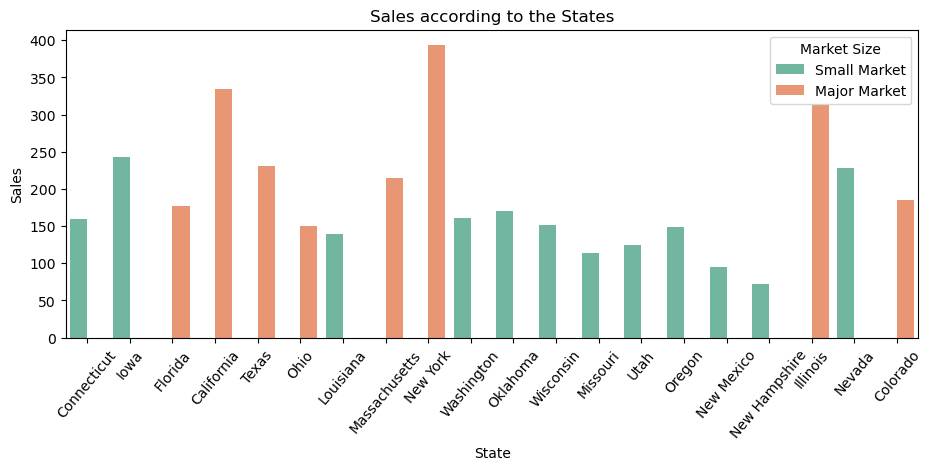

In [20]:
plt.figure(figsize = (11,4))
sns.barplot(x='State',y='Sales',data=sales, errorbar=('ci', 0),palette='Set2', hue='Market Size')  
plt.xticks(rotation=50)
plt.title('Sales according to the States',color="black")
plt.show()

* It can be seen that the Sates like Florida, California, Texas, Ohio, Massachusetts, New York, Illinois and Colorado have Major markets present.
These are the Major states with high density population, sales made in these states are very high.
* While the other states excluding them are not the major states of the country, therefore they have small market size and sales made by them are less comapred to major markets. 


## What is the Relationship between the total expense and sales of the products?

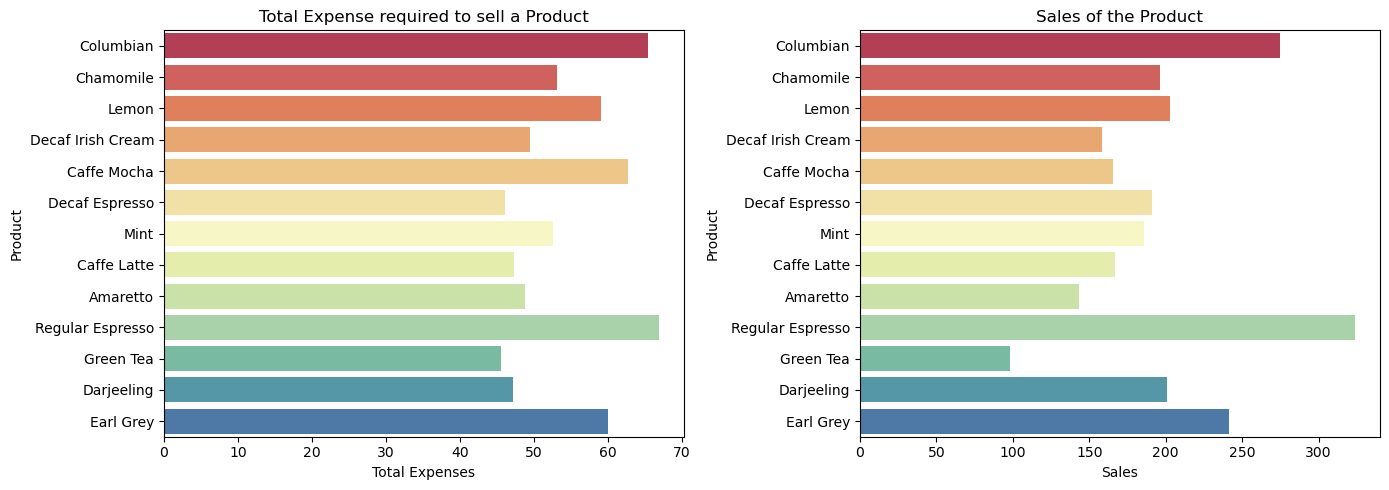

In [21]:
fig, axes = plt.subplots(1,2)
g1=sns.barplot(x="Total Expenses",y="Product", errorbar=('ci', 0),data=sales,linewidth=1.2, ax=axes[0],palette="Spectral")
g1.set_title("Total Expense required to sell a Product")
g1.set_xlabel("Total Expenses")
g1.set_ylabel("Product")

g2=sns.barplot(x='Sales',y='Product',data=sales,errorbar=('ci', 0),linewidth=1.2, ax=axes[1],palette="Spectral")
g2.set_title("Sales of the Product")
g2.set_xlabel("Sales")
g2.set_ylabel("Product")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

* The graph shows the comparion between the Total Expenses and Sales of the products.

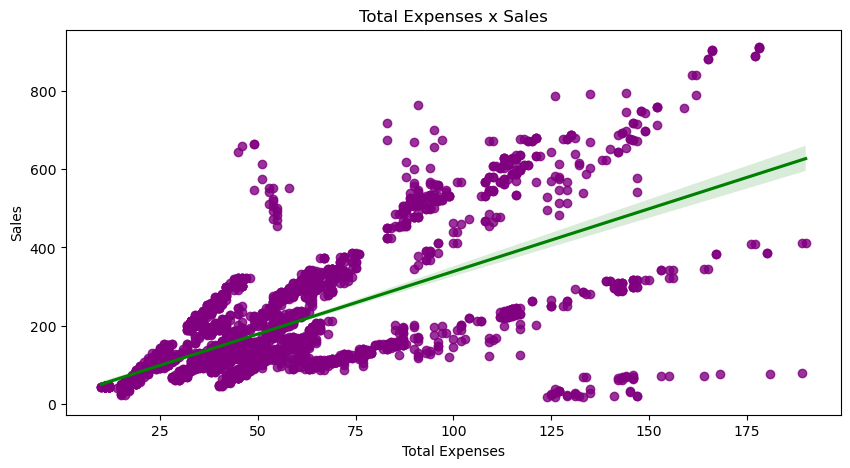

In [22]:
plt.figure(figsize=(10,5))
plt.title('Total Expenses x Sales')
sns.regplot(data=sales, x='Total Expenses', y='Sales', scatter_kws={"color": "purple"}, line_kws={"color": "green"})
plt.show()

* It can be seen that Total Expense and Sales have a linear relationship with each other.

## What is the relationship between Inventory and the Cost of Marketing of the Products?

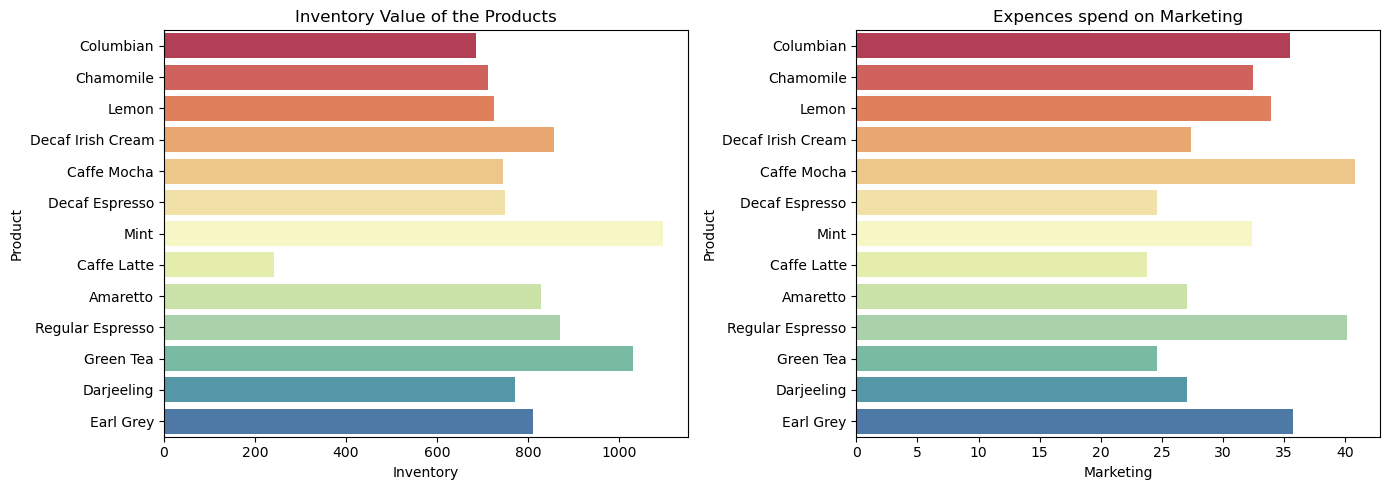

In [23]:
fig, axes = plt.subplots(1,2)
g1=sns.barplot(x="Inventory",y="Product", errorbar=('ci', 0),data=sales,linewidth=1.2, ax=axes[0],palette="Spectral")
g1.set_title("Inventory Value of the Products")
g1.set_xlabel("Inventory")
g1.set_ylabel("Product")

g2=sns.barplot(x='Marketing',y='Product',data=sales,errorbar=('ci', 0),linewidth=1.2, ax=axes[1],palette="Spectral")
g2.set_title("Expences spend on Marketing")
g2.set_xlabel("Marketing")
g2.set_ylabel("Product")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

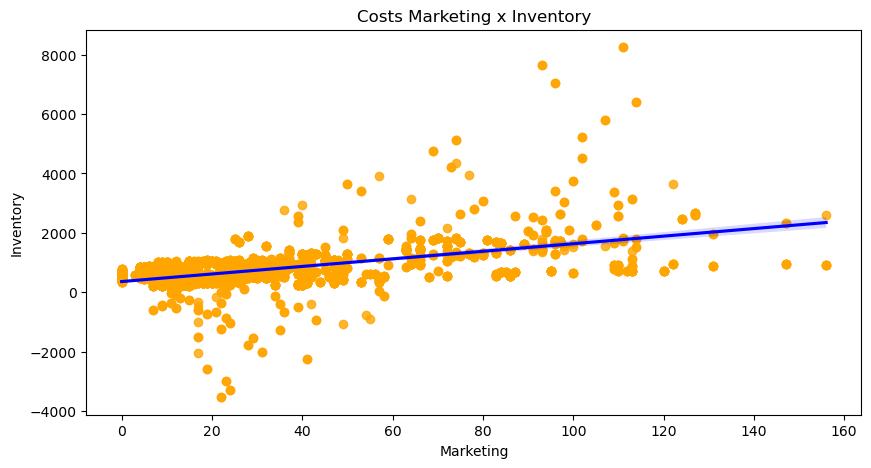

In [24]:
plt.figure(figsize=(10,5))
plt.title('Costs Marketing x Inventory')
sns.regplot(data=sales, x='Marketing', y='Inventory', scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
plt.show()

* The Graph is more towards no colreation.
* From the above graph it can be seen that majourly if the inventory value of the product is low then the amount spend on Marketing is also less.
* There are also many products whose inventory value is high but the amount spend on marketing is low.
* There are also few peoducts whose inventory value is low and amount spend on marketing is very high.

## How is the relationship between Total Expenses and Cost of Marketing of Products?

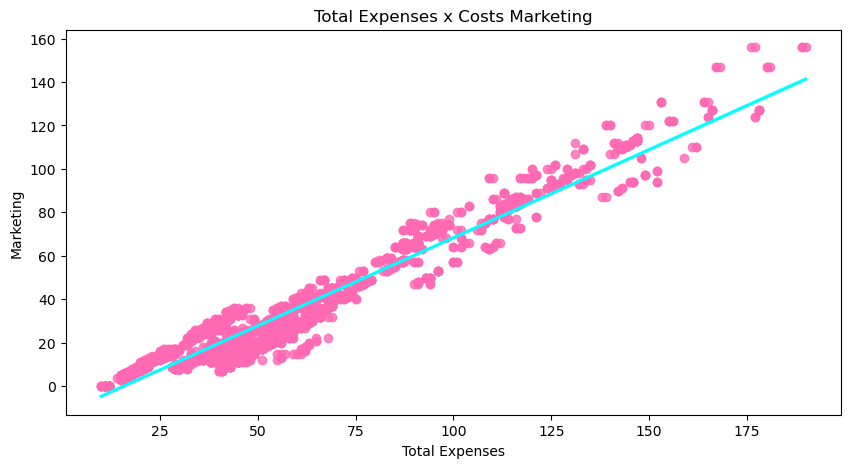

In [25]:
# Total Expenses - Marketing (Linear Coefficient: 96.66%)

plt.figure(figsize=(10,5))
plt.title('Total Expenses x Costs Marketing')

sns.regplot(data=sales, x='Total Expenses', y='Marketing', scatter_kws={"color": "hotpink"}, line_kws={"color": "cyan"})
plt.show()

* Total Expenses and Marketing have a strong positive corelation. 
* With the increse in the Marketing costs the Total Expense of the store also increases.

## How has the sales of products been over the period of time?

<Axes: title={'center': 'SELLING PRICE OVER YEAR'}, xlabel='Date', ylabel='Selling Price'>

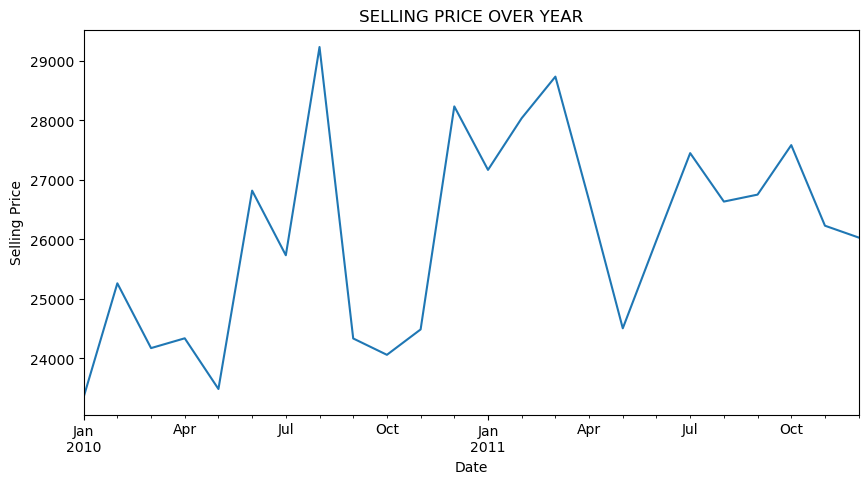

In [26]:
plt.figure(figsize = (10,5))
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("SELLING PRICE OVER YEAR")
y=sales.groupby(["Date"])['Sales'].sum()
y.plot()

* The the above line graph the overall sales in 2011 is more than 2010.
* In the month of May the there is least amout of sale in the entire year.





## Feature Selection

In [27]:
# drop Product
sales.drop(['Product'], axis=1, inplace=True)

As far the 'ProductId' Feature indicates each product there's no need to maintain 'Product' Feature.

In [28]:
# drop Profit & Margin
sales.drop(['Profit','Margin'], axis=1, inplace=True)

The 'Profit' and 'Margin' Featurees are 'Future Features', that is, their values are calculated with our target ('Sales') already known, we gotta drop them too in order to avoid Target. Leakage

In [29]:
# drop State
sales.drop('State' , inplace=True, axis=1)

As we already have 'Area Code' for each State, there is not need of keeping the 'State' variable.

In [30]:
# drop Date
sales.drop("Date", inplace=True, axis=1)

In the above steps day, month & year had been been already extracted, so there is no need of keeping the 'Date' variable.

In [31]:
sales.head()

,Area Code,Market,Market Size,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,sales_date,sales_month,sales_year
0,203,East,Small Market,292,116,69,38,962,110,110,160,270,2,Coffee,1,4,2010
1,203,East,Small Market,225,90,60,29,1148,90,80,130,210,2,Coffee,1,7,2010
2,203,East,Small Market,325,130,73,42,1134,130,110,180,290,2,Coffee,1,11,2010
3,203,East,Small Market,289,115,69,37,1166,110,100,160,260,2,Coffee,1,12,2010
702,319,Central,Small Market,678,291,129,96,1742,240,250,340,590,8,Herbal Tea,1,7,2010


In [32]:
# Creating 'Budget Total Expenses' Feature
sales.insert(loc=12, column='Budget Total Expenses', value=sales['Budget Margin'] - sales['Budget Profit'])
sales.head()

,Area Code,Market,Market Size,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Budget Total Expenses,ProductId,Product Type,sales_date,sales_month,sales_year
0,203,East,Small Market,292,116,69,38,962,110,110,160,270,50,2,Coffee,1,4,2010
1,203,East,Small Market,225,90,60,29,1148,90,80,130,210,40,2,Coffee,1,7,2010
2,203,East,Small Market,325,130,73,42,1134,130,110,180,290,50,2,Coffee,1,11,2010
3,203,East,Small Market,289,115,69,37,1166,110,100,160,260,50,2,Coffee,1,12,2010
702,319,Central,Small Market,678,291,129,96,1742,240,250,340,590,100,8,Herbal Tea,1,7,2010


Create a new column:  Budget Total Expenses=Budget Margin-Budget Profit.

In [33]:
sales.describe()

,Area Code,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Budget Total Expenses,ProductId,sales_date,sales_month,sales_year
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000,3240.000000
mean,657.567593,192.979630,85.330864,54.520062,31.455556,762.003395,59.672840,75.506173,99.978395,175.484568,40.305556,6.781790,1.0,6.484259,2010.502469
std,186.459373,154.854484,69.198564,32.982246,27.663470,706.488235,81.978192,66.797168,94.164234,149.590817,30.271987,3.531481,0.0,3.464868,0.500071
min,203.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,0.000000,1.000000,1.0,1.000000,2010.000000
25%,505.000000,95.000000,41.000000,33.000000,13.000000,427.000000,20.000000,30.000000,50.000000,80.000000,20.000000,4.000000,1.0,3.000000,2010.000000
50%,646.000000,135.000000,60.000000,46.000000,22.000000,625.000000,40.000000,50.000000,70.000000,130.000000,30.000000,6.000000,1.0,6.000000,2011.000000
75%,801.000000,231.250000,103.000000,66.000000,40.000000,940.000000,80.000000,90.000000,130.000000,210.000000,50.000000,9.000000,1.0,9.000000,2011.000000
max,985.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,170.000000,13.000000,1.0,12.000000,2011.000000


Inventory minimum values are negative: it's not possible to happen, because at the moment the inventory is equals zero, the market doesn't have the product phisically to sell. So, let's make a small Data Transformation to convert all negative Invetories to zero;


In [34]:
# Converting all negative values of inventory to zero
sales['Inventory'] = sales['Inventory'].apply(lambda x: x if x >= 0 else 0)
sales.describe()

,Area Code,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Budget Total Expenses,ProductId,sales_date,sales_month,sales_year
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000,3240.000000
mean,657.567593,192.979630,85.330864,54.520062,31.455556,785.144444,59.672840,75.506173,99.978395,175.484568,40.305556,6.781790,1.0,6.484259,2010.502469
std,186.459373,154.854484,69.198564,32.982246,27.663470,648.447129,81.978192,66.797168,94.164234,149.590817,30.271987,3.531481,0.0,3.464868,0.500071
min,203.000000,17.000000,0.000000,10.000000,0.000000,0.000000,-320.000000,0.000000,-210.000000,0.000000,0.000000,1.000000,1.0,1.000000,2010.000000
25%,505.000000,95.000000,41.000000,33.000000,13.000000,427.000000,20.000000,30.000000,50.000000,80.000000,20.000000,4.000000,1.0,3.000000,2010.000000
50%,646.000000,135.000000,60.000000,46.000000,22.000000,625.000000,40.000000,50.000000,70.000000,130.000000,30.000000,6.000000,1.0,6.000000,2011.000000
75%,801.000000,231.250000,103.000000,66.000000,40.000000,940.000000,80.000000,90.000000,130.000000,210.000000,50.000000,9.000000,1.0,9.000000,2011.000000
max,985.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,170.000000,13.000000,1.0,12.000000,2011.000000


### Label Encoding

In [35]:
colname=[]
for x in sales.columns:
    if sales[x].dtype=='object':
        colname.append(x)
colname

['Market', 'Market Size', 'Product Type']

In [36]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder() 
for x in colname:
    sales[x]=le.fit_transform(sales[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('Mapping', le_name_mapping)

Feature Market
Mapping {'Central': 0, 'East': 1, 'South': 2, 'West': 3}
Feature Market Size
Mapping {'Major Market': 0, 'Small Market': 1}
Feature Product Type
Mapping {'Coffee': 0, 'Espresso': 1, 'Herbal Tea': 2, 'Tea': 3}


In [37]:
# Split data into X  & Y
X = sales.copy()
Y = X.pop('Sales')

## Standardization

In [38]:
# scaling the data performing standardization
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X)
X = scaler.transform(X)

## Model Building  
### Aritificial Neural Network

In [39]:
# import libraries
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop

In [40]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,      
                                                    random_state=11111)

In [41]:
# print shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2268, 17)
(2268,)
(972, 17)
(972,)


In [42]:
model = Sequential()

In [43]:
model.add(Dense(10, activation='relu', input_dim=17))

In [44]:
model.add(Dense(10, activation='relu'))

In [45]:
model.add(Dense(10, activation='relu'))

In [46]:
model.add(Dense(1, activation='relu'))

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 411 (1.61 KB)
Trainable params: 411 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history = model.fit(X_train, Y_train, epochs=200, validation_split=0.2)

Epoch 1/200

57/57 [==============================] - 3s 10ms/step - loss: 61066.6133 - val_loss: 59110.7695
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 60356.1953 - val_loss: 57935.3320
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 58036.3516 - val_loss: 53795.5039
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 50303.4414 - val_loss: 42492.8750
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 34462.8594 - val_loss: 24552.6680
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 16831.1699 - val_loss: 10603.4707
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 8843.0439 - val_loss: 7086.0942
Epoch 8/200
57/57 [==============================] - 0s 4ms/step - loss: 7311.3555 - val_loss: 6081.3115
Epoch 9/200
57/57 [==============================] - 0s 3ms/step - loss: 6415.6802 - val_loss: 5303.8154
Epoch 10/200
57/57 [=====================

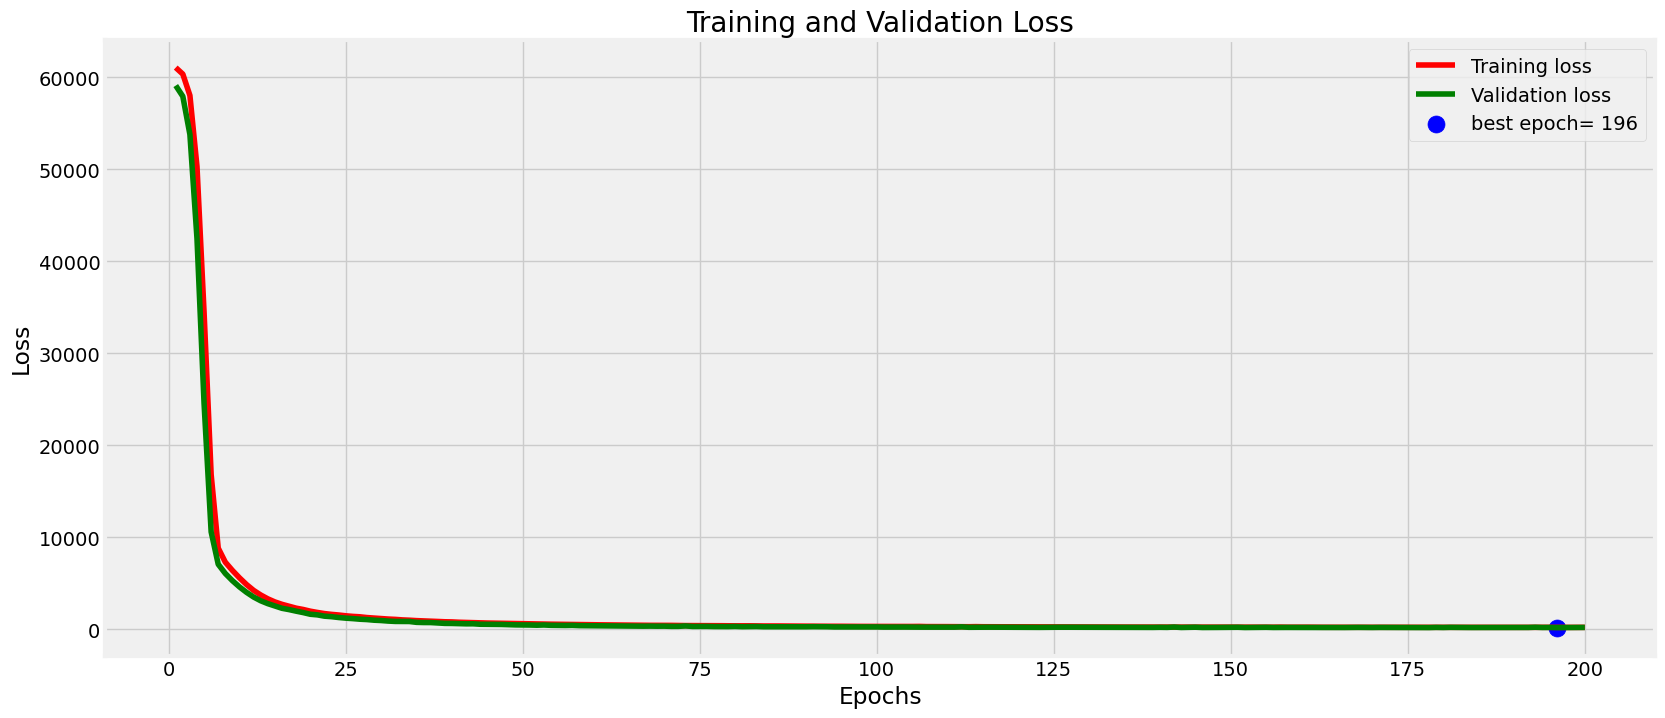

In [50]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


In [51]:
y_pred = model.predict(X_test)

31/31 [==============================] - 0s 2ms/step


## Evaluation

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.990716414265811
RMSE: 15.062161776979806
Adj R-square: 0.9906674319698826


# Conclusion

The questions answered about his data are:
1. What are the different categories of Major Products?
2. How are the sales of these Major Products?
3. How are the sales of different Products?
4. What are the different market sizes?
5. How are the sales of different market sizes?
6. How are the Sales in different States according to the market size?
7. What is the Relationship between the total expense and sales of the products?
8. What is the relationship between Inventory and the Cost of Marketing of the Products?
9. How is the relationship between Total Expenses and Cost of Marketing of Products?
10. How has the sales of products been over the period of time?

The model is build upon Artificial Neural Network.

The evaluation metrics ( R-squared & Adj R-square )  gives good values. Hence the model is very good.